# Import Libraries

In [132]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [116]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [117]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [118]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [119]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

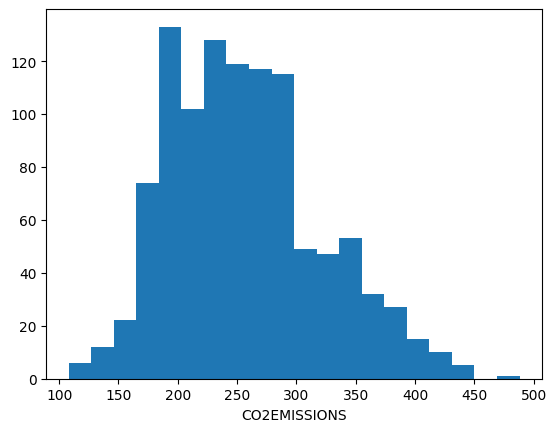

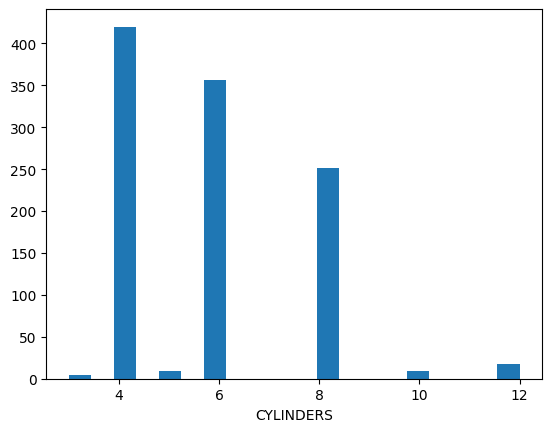

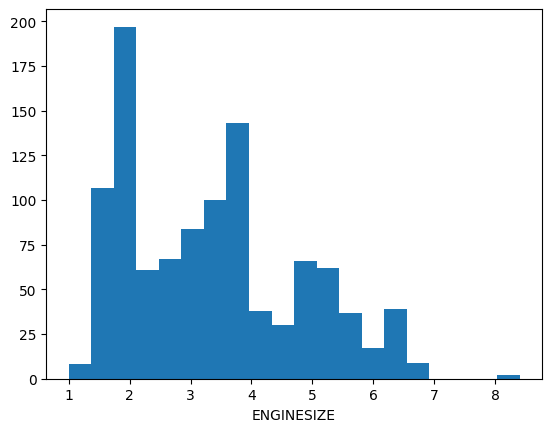

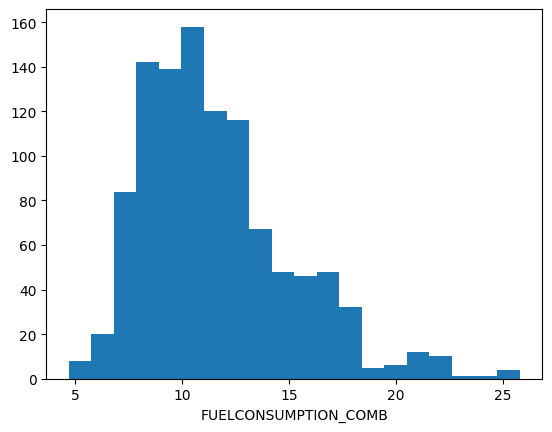

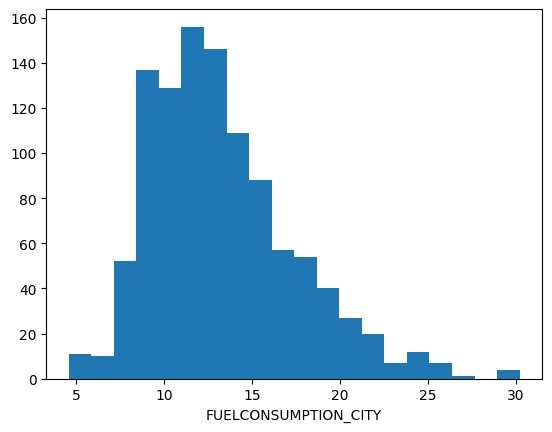

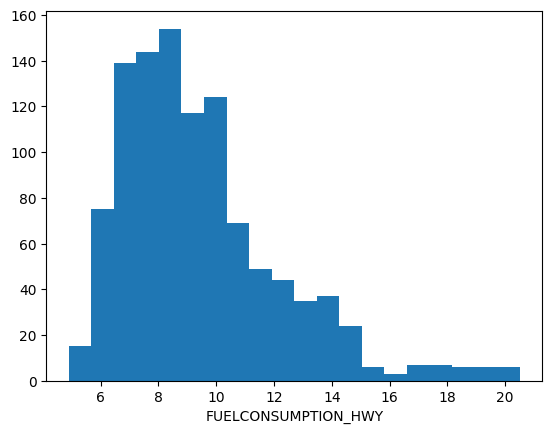

In [122]:
columns = ['CO2EMISSIONS', 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']

for column in columns:
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.show()

###### Exercise 2 : Scatter Plots

Plot 6 scatter plots, the 6 X features with CO2EMISSIONS.

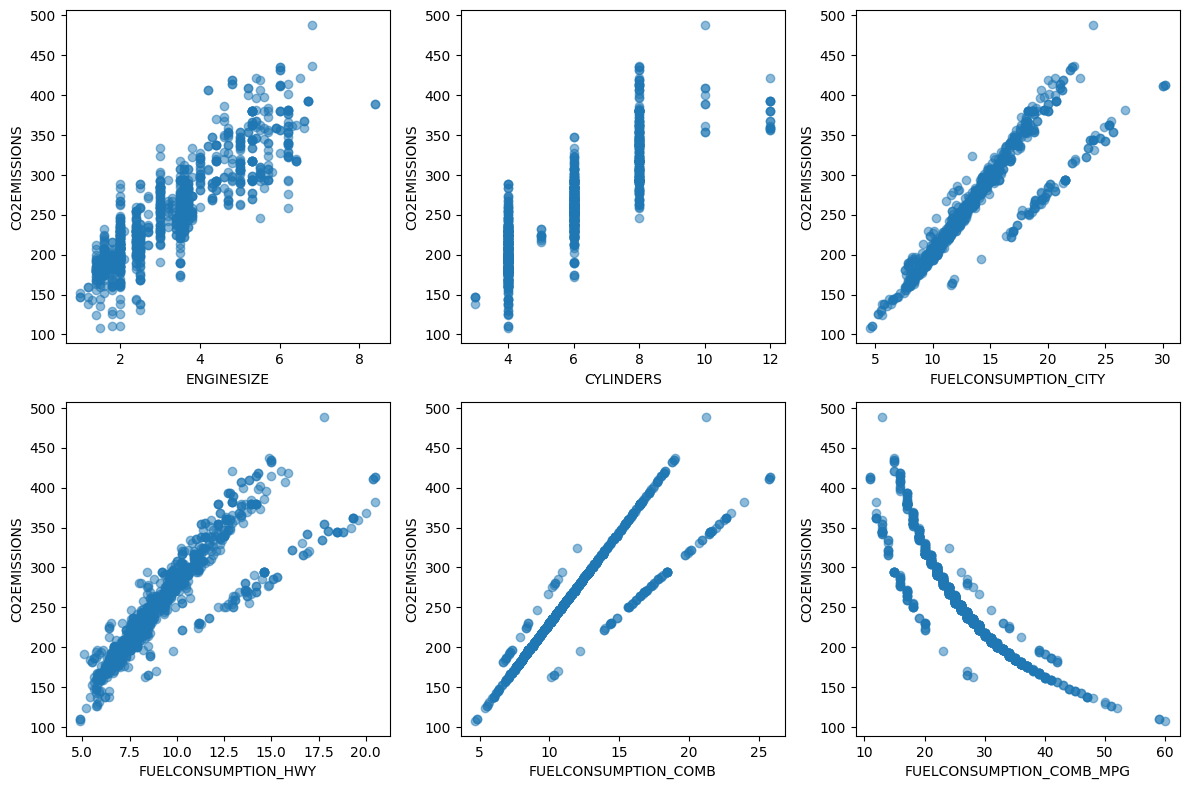

In [123]:
x_features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, feature in zip(axes.flatten(), x_features):
    ax.scatter(df[feature], df['CO2EMISSIONS'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.show()

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

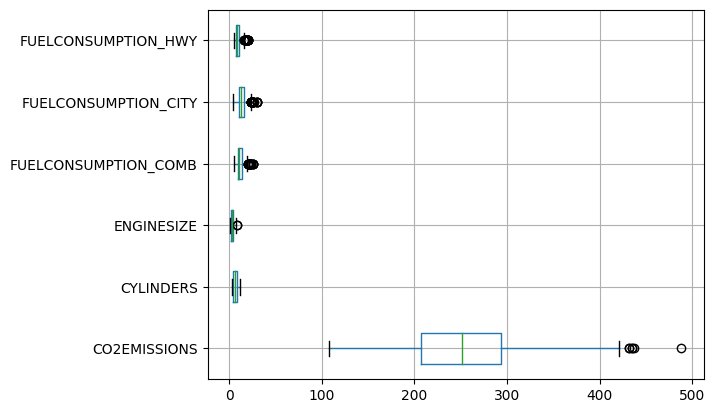

In [124]:
df.boxplot(column = ['CO2EMISSIONS', 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'], vert=False)
plt.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [125]:
upper_limit= df['CO2EMISSIONS'].mean() + 3*df['CO2EMISSIONS'].std()
lower_limit= df['CO2EMISSIONS'].mean() - 3*df['CO2EMISSIONS'].std()
print('upper limit:' , upper_limit)
print('lower limit:' , lower_limit)

upper limit: 446.3455918663571
lower limit: 66.11176520955672


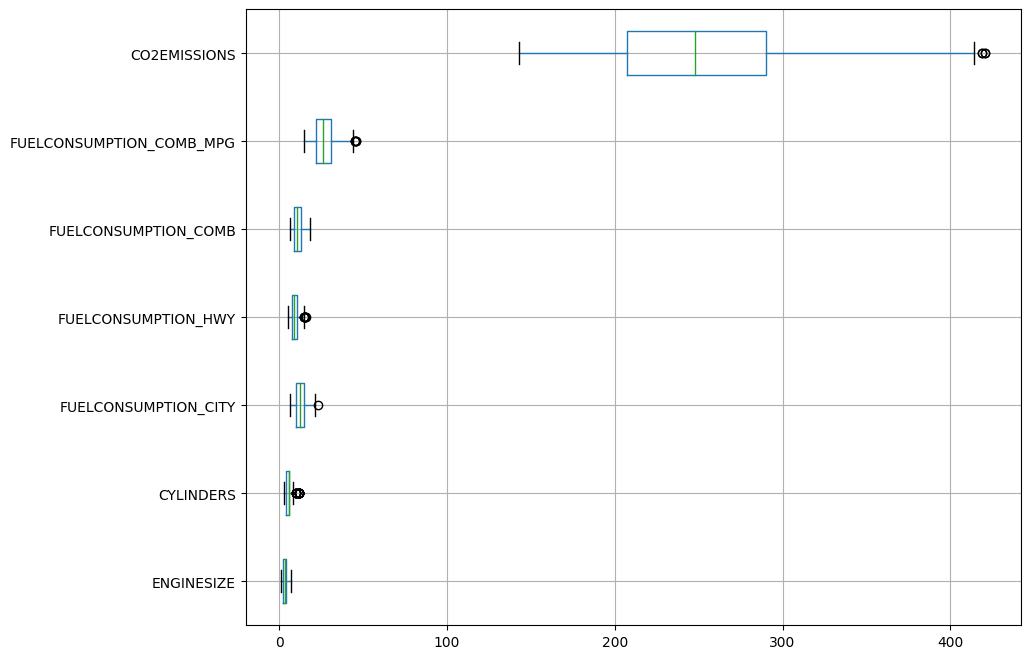

In [129]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

plt.figure(figsize=(10, 8))
df_no_outliers.boxplot(vert=False)
plt.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [135]:
X = df.drop('CO2EMISSIONS', axis=1) 
Y = df['CO2EMISSIONS']  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [151]:

X = df[['ENGINESIZE']]
Y = df['CO2EMISSIONS']

model = LinearRegression()

try:
    model.fit(X, Y)

    coefficients = model.coef_
    intercept = model.intercept_

    print("Coefficients:", coefficients)
    print("Intercept:", intercept)

except Exception as e:
    print("An error occurred during model fitting:", str(e))

Coefficients: [39.12519979]
Intercept: 125.30409949535692


# Exercise 5 : Plot the Output

Plot linear regression model (output).

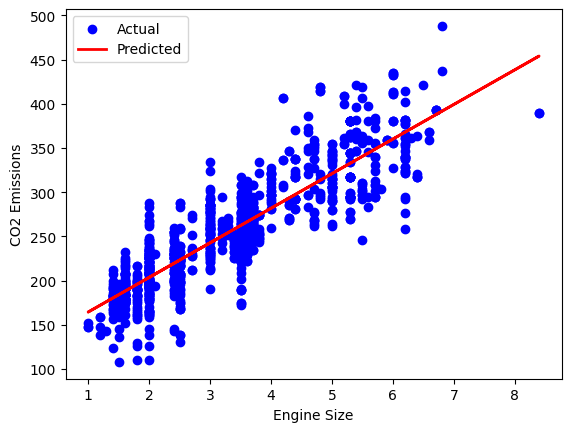

In [152]:
model = LinearRegression()

model.fit(X, Y)

predictions = model.predict(X)

plt.scatter(X, Y, color='blue', label='Actual')

plt.plot(X, predictions, color='red', linewidth=2, label='Predicted')

plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

plt.legend()
plt.show()

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [154]:

predictions = model.predict(X)

mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y, predictions)
r2 = r2_score(Y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 946.314052718875
Root Mean Squared Error (RMSE): 30.762217942126263
Mean Absolute Error (MAE): 23.346887834400427
R-squared (R²): 0.7641458597854816


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

In [160]:
train_features = ['ENGINESIZE']
target = 'CO2EMISSIONS'

evaluation_metrics = {}

for feature in ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']:
    X = df[[feature]]
    Y = df[target]

    model = LinearRegression()

    model.fit(X, Y)

    predictions = model.predict(X)

    mse = mean_squared_error(Y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y, predictions)
    r2 = r2_score(Y, predictions)

    evaluation_metrics[feature] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}

sorted_models = sorted(evaluation_metrics.items(), key=lambda x: x[1]['RMSE'])

for feature, metrics in evaluation_metrics.items():
    print("Evaluation metrics for", feature)
    print("MSE:", metrics['MSE'])
    print("RMSE:", metrics['RMSE'])
    print("MAE:", metrics['MAE'])
    print("R-squared:", metrics['R-squared'])
    print()

print("Sorted models based on RMSE:")
for model in sorted_models:
    print(model[0])

Evaluation metrics for ENGINESIZE
MSE: 946.314052718875
RMSE: 30.762217942126263
MAE: 23.346887834400427
R-squared: 0.7641458597854816

Evaluation metrics for CYLINDERS
MSE: 1115.560077786762
RMSE: 33.400001164472464
MAE: 25.715751742888443
R-squared: 0.7219639059061919

Evaluation metrics for FUELCONSUMPTION_COMB
MSE: 818.9337617545483
RMSE: 28.61701874330288
MAE: 20.36096654815625
R-squared: 0.7958934270115507

Evaluation metrics for FUELCONSUMPTION_CITY
MSE: 776.4848209295999
RMSE: 27.865477224149597
MAE: 19.429619299986843
R-squared: 0.8064731689191343

Evaluation metrics for FUELCONSUMPTION_HWY
MSE: 1032.7239858198955
RMSE: 32.13602317991284
MAE: 24.036012923840723
R-squared: 0.7426095205342778

Sorted models based on RMSE:
FUELCONSUMPTION_CITY
FUELCONSUMPTION_COMB
ENGINESIZE
FUELCONSUMPTION_HWY
CYLINDERS


# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

#Plot the output for each feature with the Y label.

In [163]:

features = ['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']
target = 'CO2EMISSIONS'

X = df[features]
Y = df[target]

model = LinearRegression()

model.fit(X, Y)

predictions = model.predict(X)

mse = mean_squared_error(Y, predictions)
rmse = mean_squared_error(Y, predictions, squared=False)
mae = mean_absolute_error(Y, predictions)
r2 = r2_score(Y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    return accuracy, recall, precision, f1, auc_roc

lasso_scores = []
for lasso_model in lasso_models:
    scores = evaluate_model(lasso_model, X_test, y_test)
    lasso_scores.append(scores)

ridge_scores = []
for ridge_model in ridge_models:
    scores = evaluate_model(ridge_model, X_test, y_test)
    ridge_scores.append(scores)

elasticnet_scores = []
for elasticnet_model in elasticnet_models:
    scores = evaluate_model(elasticnet_model, X_test, y_test)
    elasticnet_scores.append(scores)

Mean Squared Error (MSE): 544.9679057866376
Root Mean Squared Error (RMSE): 23.34454766720995
Mean Absolute Error (MAE): 16.898424050719818
R-squared (R²): 0.8641751789540445
